In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
# Load datasets
# df = pd.read_csv('5_6_all_map_severe.csv')
df = pd.read_csv('0_all.csv')

In [16]:
df['Emotional and/ or Psychological Impact'].unique()

array(['Mild', 'None', 'Moderate', nan, 'Multiple', 'Severe'],
      dtype=object)

In [31]:
# Create a mapping dictionary to standardize the values
impact_mapping = {
    'Mild - Upset/Angry/Scared/Humiliated': 'Mild',
    'Mild - Upset / Angry / Scared / Humiliated': 'Mild',
    'Mild ?C Upset / Angry / Scared / Humiliated': 'Mild',
    'None - No emotional and/or Psychological Impact': 'None',
    'None - No Emotional or Psychological Impact': 'None',
    'None ?C No emotional and/or psychological impact': 'None',
    'None - No emotional and/or psychological impact': 'None',
    'Moderate - Moderate Emotional and/or Psychological Impact with no missed work but return to work with modifications': 'Moderate',
    'Moderate - Moderate emotional and/or psychological impact with no missed work.': 'Moderate',
    'Severe - Significant Emotional and/or psychological impact resulting in missed work.': 'Severe',
    '3 staff affected': 'Multiple',  # Assuming this means multiple staff were affected
    '  ': np.nan  # Convert empty strings to NaN
}

# Apply the mapping to the column
df['Emotional and/ or Psychological Impact'] = df['Emotional and/ or Psychological Impact'].map(impact_mapping)

## Graph

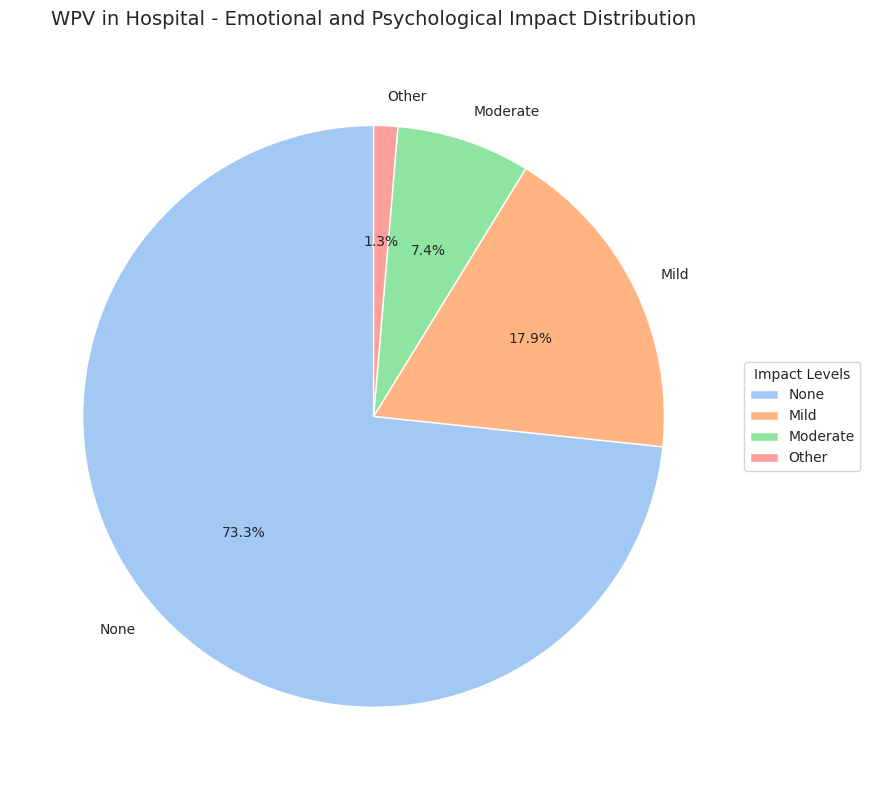

In [27]:
plt.figure(figsize=(10, 8))
sns.set_style("white")

# Count categories and filter small slices (excluding NaN)
category_counts = df['Emotional and/ or Psychological Impact'].value_counts(dropna=True)
min_threshold = 0.02 * category_counts.sum()  # 2% threshold for grouping into "Other"
filtered_counts = category_counts[category_counts > min_threshold]
other_count = category_counts[category_counts <= min_threshold].sum()

# Add "Other" category if small slices exist
if other_count > 0:
    filtered_counts["Other"] = other_count

# Custom colors
colors = sns.color_palette("pastel")[:len(filtered_counts)]

# Plot pie chart
plt.pie(
    filtered_counts,
    labels=filtered_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 10}
)

# Add title and legend
plt.title("WPV in Hospital - Emotional and Psychological Impact Distribution", fontsize=14, pad=20)
plt.legend(
    filtered_counts.index,
    title="Impact Levels",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

## Map to Number

In [32]:
# Create a mapping dictionary for numerical values
numerical_mapping = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Multiple': np.nan  # Treat 'Multiple' as NaN since it's not a severity level
}

# Create the new numerical column
df['General Emotional Numerical'] = df['Emotional and/ or Psychological Impact'].map(numerical_mapping)

# Verify the unique values in the new column
print(df['General Emotional Numerical'].unique())

[ 1.  0.  2. nan  3.]


In [33]:
df.head()

,Event Date,Facility Type,Department/Office Incident Took Place,Occupational Category of Person Affected,Aggressor,Type of Violence,Primary Contributing Factors,Severity of Assault,Primary Assault Description,Assault Description,Emotional and/ or Psychological Impact,Level of Care Needed,Response Action Taken,General Emotional Numerical
0,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,"Physical, Verbal",Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild,NaN,"Security Called, Law Enforcement Called, De-es...",1.0
1,2/6/2024,ED,Patient room,"Nurse (RN, LPN), Security, Allied Health/Techn...",Patient,"Physical, Verbal","Altered Mental Status, Inpatient Bed Unavailable",None - No Contact/Unwanted Contact w/No Injury,"Grabbing/Pinching/Scratching/Hair Pull, Kickin...",NaN,None,NaN,"Security Called, Law Enforcement Called, Physi...",0.0
2,2/9/2024,ED,Patient room,"Nurse (RN, LPN), Physician/Advanced Practice P...",Patient,"Physical, Verbal",Inpatient Bed Unavailable,None - No Contact/Unwanted Contact w/No Injury,"Posturing, Throwing Object/Breaking Object",NaN,None,NaN,"Security Called, Law Enforcement Called, Physi...",0.0
3,2/8/2024,ED,Patient room,"Nurse (RN, LPN), Physician/Advanced Practice P...",Patient,Verbal,Inpatient Bed Unavailable,None - No Contact/Unwanted Contact w/No Injury,"Harassment, Verbal Assault, Posturing",NaN,None,NaN,"Emergency Call/Code, De-escalation Techniques,...",0.0
4,2/9/2024,ED,Behavioral health unit,"Nurse (RN, LPN)",Patient,"Physical, Verbal",Inpatient Bed Unavailable,None - No Contact/Unwanted Contact w/No Injury,"Posturing, Throwing Object/Breaking Object, Ve...",Attempting to break windows,None,NaN,"Security Called, Seclusion of Patient",0.0


In [34]:
# df.to_csv('6_7_all_map_emo.csv', index=False)
df.to_csv('0_7_all_map_emo.csv', index=False)